In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
data_duplicate = data.duplicated().any()

In [5]:
data_duplicate

True

In [6]:
data = data.drop_duplicates()

In [7]:
data_duplicate = data.duplicated().any()

In [8]:
data_duplicate

False

In [9]:
cate_val = []
cont_val = []

for column in data.columns:
    if data[column].nunique() <= 10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [10]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [11]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [12]:
data['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [13]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns=cate_val,drop_first=True)

In [14]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,150,2.3,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,187,3.5,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,172,1.4,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,178,0.8,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,163,0.6,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [17]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [18]:
x = data.drop('target',axis=1)

In [19]:
y = data['target']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [22]:
x_train

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
132,-1.375021,1,-0.661712,0.938690,0.543632,-0.899544,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
203,1.503322,1,2.760154,0.532247,0.018826,0.480328,0,1,0,1,...,1,1,0,0,0,0,0,0,0,1
197,1.392616,1,-0.376556,0.145158,0.587366,-0.727060,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
75,0.064151,0,0.193755,0.067741,0.499898,0.307844,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
177,1.060500,1,0.478910,1.712868,0.368697,-0.899544,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,-1.485726,1,-1.232023,-1.441906,0.368697,-0.899544,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
71,-0.378671,1,-2.144521,-0.377412,0.193761,-0.899544,0,1,0,0,...,1,0,1,1,0,0,0,0,0,1
106,1.614027,1,1.619532,-0.241930,-0.812118,-0.813302,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
271,0.728383,1,0.136724,-0.241930,-0.199843,1.342748,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0


In [23]:
y_train

132    1
203    0
197    0
75     1
177    0
      ..
189    0
71     1
106    1
271    0
102    1
Name: target, Length: 241, dtype: int64

In [24]:
x_test

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
180,0.064151,1,0.022661,2.061248,-0.768384,0.135360,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
229,1.060500,1,-0.376556,1.209652,-0.812118,0.652812,0,1,0,0,...,1,1,0,0,0,0,0,0,0,1
111,0.285561,1,1.049221,-2.332210,1.024705,-0.727060,0,1,0,1,...,0,0,1,1,0,0,0,0,0,1
247,1.281911,1,1.619532,-0.009677,-1.293190,-0.899544,1,0,0,0,...,1,1,0,0,0,1,0,1,0,0
60,1.835438,0,-1.232023,0.358057,-0.855851,-0.899544,0,1,0,1,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,-0.378671,1,0.478910,0.996754,-1.205722,2.722620,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1
104,-0.489377,1,-0.148432,-0.977399,0.587366,-0.899544,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
300,1.503322,1,0.707035,-1.035462,-0.374779,2.032684,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
194,0.617678,1,0.478910,-1.190298,0.237495,1.687716,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [25]:
y_test

180    0
229    0
111    1
247    0
60     1
      ..
250    0
104    1
300    0
194    0
185    0
Name: target, Length: 61, dtype: int64

In [26]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [29]:
y_pred1 = log.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test,y_pred1)

0.9016393442622951

# 10.SVC

In [32]:
from sklearn import svm

In [33]:
svm = svm.SVC()

In [34]:
svm.fit(x_train,y_train)

SVC()

In [35]:
y_pred2 = svm.predict(x_test)

In [36]:
accuracy_score(y_test,y_pred2)

0.8688524590163934

# 11.KNeighbors Classifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn = KNeighborsClassifier()

In [39]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [40]:
y_pred3 = knn.predict(x_test)

In [41]:
accuracy_score(y_test,y_pred3)

0.8688524590163934

In [42]:
score = []
for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    score.append(accuracy_score(y_test,y_pred))

In [43]:
score

[0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8688524590163934,
 0.8688524590163934,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8524590163934426,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8524590163934426,
 0.8688524590163934,
 0.8688524590163934,
 0.8524590163934426,
 0.8688524590163934,
 0.8524590163934426,
 0.8688524590163934,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426]

# Non Linear ML Algorithm 

In [44]:
data = pd.read_csv('heart.csv')

In [45]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [46]:
data = data.drop_duplicates()

In [47]:
data.shape

(302, 14)

In [48]:
x = data.drop('target',axis=1)
y=data['target']

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

# Decision Tree Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dt = DecisionTreeClassifier()

In [52]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [53]:
y_pred4 = dt.predict(x_test)

In [54]:
accuracy_score(y_test,y_pred4)

0.7868852459016393

# Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf = RandomForestClassifier()

In [57]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [58]:
y_pred5 = rf.predict(x_test)

In [59]:
accuracy_score(y_test,y_pred5)

0.8524590163934426

In [60]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF'],
                          'ACC':[accuracy_score(y_test,y_pred1),
                                accuracy_score(y_test,y_pred2),
                                accuracy_score(y_test,y_pred3),
                                accuracy_score(y_test,y_pred4),
                                accuracy_score(y_test,y_pred5)]})

In [61]:
final_data

,Models,ACC
0,LR,0.901639
1,SVM,0.868852
2,KNN,0.868852
3,DT,0.786885
4,RF,0.852459


In [62]:
import seaborn as sns

<AxesSubplot: xlabel='Models', ylabel='ACC'>

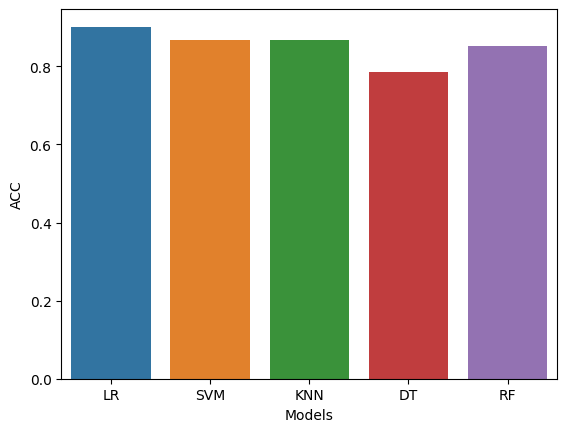

In [63]:
sns.barplot(x='Models',y='ACC',data=final_data)

In [64]:
x= data.drop('target',axis=1)
y=data['target']

In [65]:
x.shape

(302, 13)

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf = RandomForestClassifier()
rf.fit(x,y)

RandomForestClassifier()

# Prediction on new Data

In [68]:
import pandas as pd

In [69]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3,
},index=[0])

In [70]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [71]:
p = rf.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

No Disease


# Saving Model using Joblib

In [72]:
import joblib

In [73]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [74]:
model = joblib.load('model_joblib_heart')

In [75]:
model.predict(new_data)

array([0], dtype=int64)

# GUI

In [76]:
from tkinter import *
import joblib
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('model_joblib_heart')
    result = model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13]])
    
    if result==0:
        Label(master,text='No Heart Disease').grid(row=31)
    else:
        Label(master,text="Possibility of Heart Disease").grid(row=31)

master = Tk()
master.title("Heart Disease Prediction System")

label = Label(master, text="Heart Disease Prediction System",bg="black",fg="white"). grid(row=0,columnspan=2)

Label(master, text="Enter Your Age ").grid(row=1)
Label(master, text="Enter Your Gender[M:1,F:0] ").grid(row=2)
Label(master, text="Enter Value of CP ").grid(row=3)
Label(master, text="Enter Value of trestbps ").grid(row=4)
Label(master, text="Enter Value of chol ").grid(row=5)
Label(master, text="Enter Value of fbs ").grid(row=6)
Label(master, text="Enter Value of restecg ").grid(row=7)
Label(master, text="Enter Value of thalach ").grid(row=8)
Label(master, text="Enter Value of exang ").grid(row=9)
Label(master, text="Enter Value of oldpeak ").grid(row=10)
Label(master, text="Enter Value of slope ").grid(row=11)
Label(master, text="Enter Value of CA ").grid(row=12)
Label(master, text="Enter Value of thal ").grid(row=13)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)
e12.grid(row=12,column=1)
e13.grid(row=13,column=1)

Button(master, text='Predict',command=show_entry_fields).grid()

mainloop()

c:\python37\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
